# Régression Linéaire

<img src="./figures/lr.jpg" width="700px"/>

<div class="alert alert-block alert-info">
    

Soit un **train set** composé de $N$ observations:

$$
S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}.
$$

La matrice des **features** $\boldsymbol{X}$ et le vecteur (ou matrice) des **targets** $\boldsymbol{y}$ sont définis de la manière suivante:

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & \boldsymbol{x_1}^T \\
\vdots & \vdots \\
1 & \boldsymbol{x_N}^T 
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} &\cdots & x_{Np}
\end{pmatrix}~
\text{  et  }~
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


La solution de la **régression linéaire (LR)** est le vecteur de coefficients

$$\boldsymbol{\hat \beta} = (\hat \beta_0, \dots, \hat \beta_p)$$
    
obtenu via minimisation de la **somme résiduelle des carrés** ou **residual sum of squares (RSS)**, qui représente la distance entre les prédictions $\hat y_i$ et les réponses $y_i$:

$$
\mathrm{RSS(\boldsymbol{\beta})} 
:= \sum_{i=1}^N \big(\hat y_i - y_i \big)^2 = \sum_{i=1}^N \big(\boldsymbol{x_i}^T \boldsymbol{\beta} - y_i \big)^2 
= \| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \|^2
$$

On a alors (cf. cours):

$$
\boldsymbol{\hat{\beta}} 
= \underset{\boldsymbol{\beta}}{\arg \min} RSS(\boldsymbol{\beta}) = \underset{\boldsymbol{\beta}}{\arg \min} \left\| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \right\|^2 
= (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

Une fois le vecteur $\boldsymbol{\hat \beta}$ obtenu, les **prédictions** associées à des features $\boldsymbol{X}$ sont données par:
    
$$
\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{\hat \beta}
$$
    
</div>

## Exercice


### Generate data
1. Le code de cette section génère des data bruitées à partir de l'équation d'une droite.<br>
   Ensuite, les data sont séparées en un **train set** et un **test set**.<br>
   Comprenez ce code...
   
   
### Model
2. Dans la classe `LinearRegression()`, complétez la méthode `fit(...)` qui, étant donné un **train set** `X_train, y_train` (**features** et **targets**), calcule la solution `beta_hat` de la régression linéaire selon l'équation présentée ci-dessus. Cette solution sera stockée dans l'attribut `self.beta_hat`. <br>


3. Compétez la méthode `predict(...)` qui retourne les **prédictions** `y_hat` associées à un ensemble de features `X`. <br>


### Training and Results
4. En utilisant votre classe `LinearRegression()`, instanciez et entraînez une **régression linéaire** sur le train set `X_train, y_train`.


5. Calculez les prédictions associées au test features `X_test`.


6. Faites les graphe des points du test set et de leur prédictions repsectives.


### Multidimension

7. En vous inspirant du point 1, génèrez des data bruitées de dimension supérieures, par exemple de dimension $7$. Séparez ces data en un train et un test set. En utilisant votre classe `LinearRegression()`, instanciez une **régression linéaire**, entrâinez-la sur votre train set, puis claculez les prédictions sur votre test set. Obtenez-vous de bons résultats?


### Ridge Regression


8. Dans votre classe `LinearRegression()`, ajouter une fonctionalité qui permet d'implémenter la **régression Ridge**. On rappelle que la solution de la régression Ridge est (cf. cours)
$$
\mathbf{\hat \beta} = (\mathbf{X^T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X^T} \mathbf{y}
$$

Évaluez votre régression Ridge sur vos data unidimensionnelles et multidimensionnelles. Obtenez-vous de meilleurs résultats que pour la régression linéaire?

## Libraries

In [16]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Generate data

In [17]:
# generate data
X, y, coeff = make_regression(n_samples=500, n_features=1, 
                              noise=30, bias=30, coef=True, 
                              random_state=42)

In [18]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 1), (400,), (100, 1), (100,))

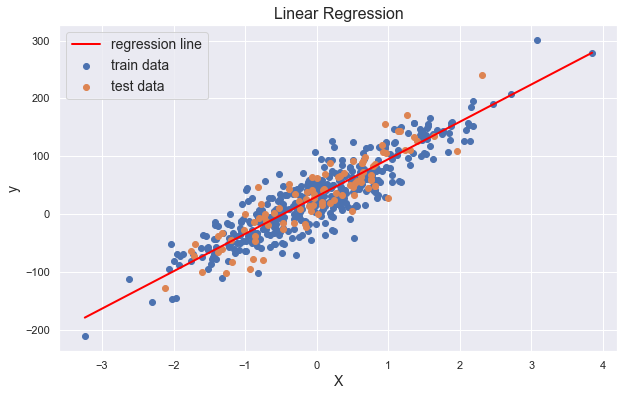

In [20]:
# plot train and test data
plt.figure(figsize=(10, 6))

x_true = np.linspace(X_train.min(), X_train.max(), num=100)
y_true = coeff * x_true + 30 # 30 is the bias

plt.scatter(X_train, y_train, marker = 'o', label="train data")
plt.scatter(X_test, y_test, marker = 'o', label="test data")
plt.plot(x_true, y_true, color="red", linewidth=2, label="regression line")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.title("Linear Regression", fontsize=16)

plt.savefig("lr.jpg", bbox_inches='tight')
plt.show()

## Model

In [143]:
class LinearRegression():
    """
    Implements the linear regression algorithm.
    Closed-form solution (not gradient descent)
    """
    
    def __init__(self):
        """
        Constructor.
        """
        
        self.beta_hat = None # empty solution
        
    
    def fit(self, X_train, y_train):
        """
        Fits the linear regression on the train set X_train, y_train.
        This method modifies the attribute beta_hat, which stores the solution of the LR. 
        
        Parameters
        ----------
        X_train : ndarray
            Train features of dim N x p, where p is the number of features.
        y_train : ndarray
            Train targets dim N x 1 (or N x q if multi-dimensional targets)
        """
        
        pass
        
        
    def predict(self, X):
        """
        Computes the predictions associated to features X.
        The predictions are computed as follows:
        - expand the features X with a first column of 1's
        - y_hat = X beta_hat
        
        Parameters
        ----------
        X : ndarray
            Features of dim N' x p, where p is the number of features.
            
        Returns
        -------
        y_hat : ndarray
            Predictions of dim N' x 1 (or N' x q if multi-dimensional targets)
        """
        
        pass

## Training and Results

## Multidimension

## Ridge Regression